# Author Name - Vedant Panday
# Task 4 - Exploratory Analysis Terrorism
# As a security/defence Analyst , try to find out hot areas of terrorism

# Importing Libraries and Data

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('globalterrorismdb_0718dist.csv',encoding="latin1",low_memory=False)

In [3]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
df.select_dtypes([('object')]).columns

Index(['approxdate', 'resolution', 'country_txt', 'region_txt', 'provstate',
       'city', 'location', 'summary', 'alternative_txt', 'attacktype1_txt',
       'attacktype2_txt', 'attacktype3_txt', 'targtype1_txt',
       'targsubtype1_txt', 'corp1', 'target1', 'natlty1_txt', 'targtype2_txt',
       'targsubtype2_txt', 'corp2', 'target2', 'natlty2_txt', 'targtype3_txt',
       'targsubtype3_txt', 'corp3', 'target3', 'natlty3_txt', 'gname',
       'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive',
       'claimmode_txt', 'claimmode2_txt', 'claimmode3_txt', 'weaptype1_txt',
       'weapsubtype1_txt', 'weaptype2_txt', 'weapsubtype2_txt',
       'weaptype3_txt', 'weapsubtype3_txt', 'weaptype4_txt',
       'weapsubtype4_txt', 'weapdetail', 'propextent_txt', 'propcomment',
       'divert', 'kidhijcountry', 'ransomnote', 'hostkidoutcome_txt',
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'related'],
      dtype='object')

In [5]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [6]:
df.nunique().head(30)

eventid            181691
iyear                  47
imonth                 13
iday                   32
approxdate           2244
extended                2
resolution           1859
country               205
country_txt           205
region                 12
region_txt             12
provstate            2855
city                36674
latitude            48322
longitude           48039
specificity             5
vicinity                3
location            44109
summary            112492
crit1                   2
crit2                   2
crit3                   2
doubtterr               3
alternative             5
alternative_txt         5
multiple                2
success                 2
suicide                 2
attacktype1             9
attacktype1_txt         9
dtype: int64

# Top 20  years with most attacks takes place

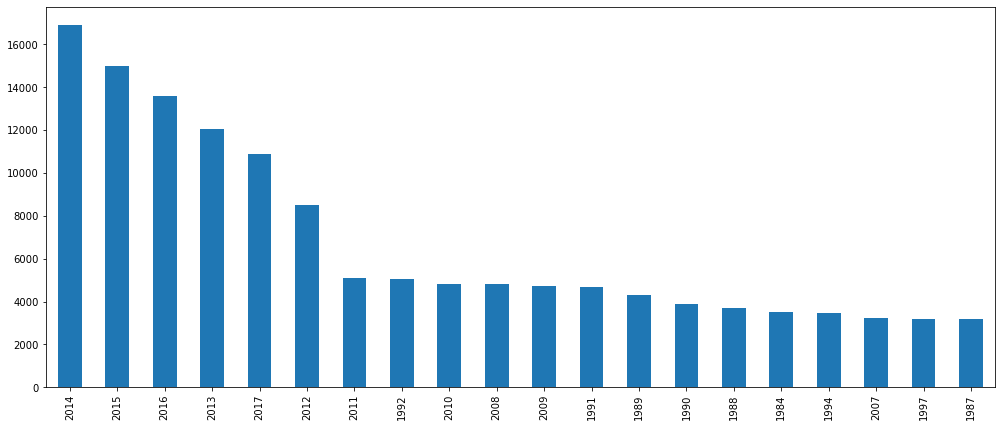

In [7]:
df['iyear'].value_counts().head(20).plot(kind='bar',figsize=(17,7))

# Top 20 countries attacked by the terrorists

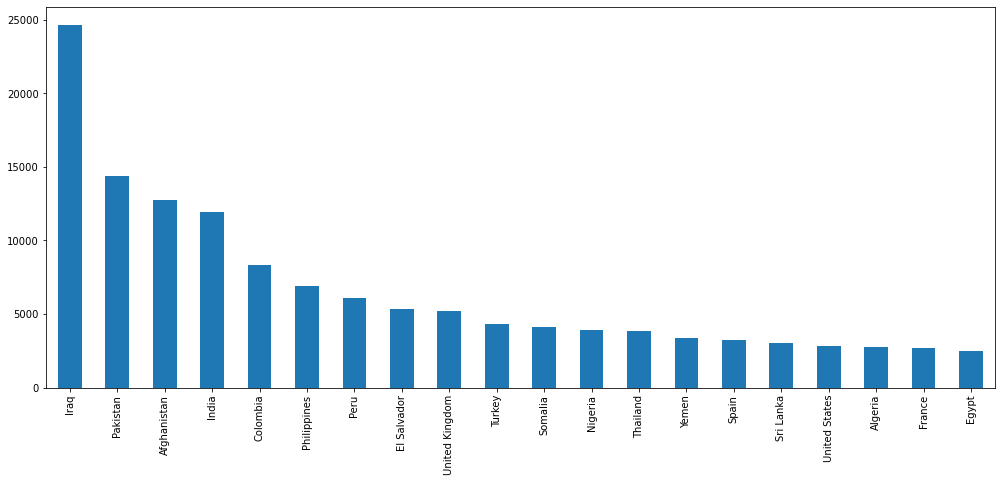

In [8]:
df['country_txt'].value_counts().head(20).plot(kind='bar',figsize=(17,7))

# Top 20 cities attacked by the terrorists

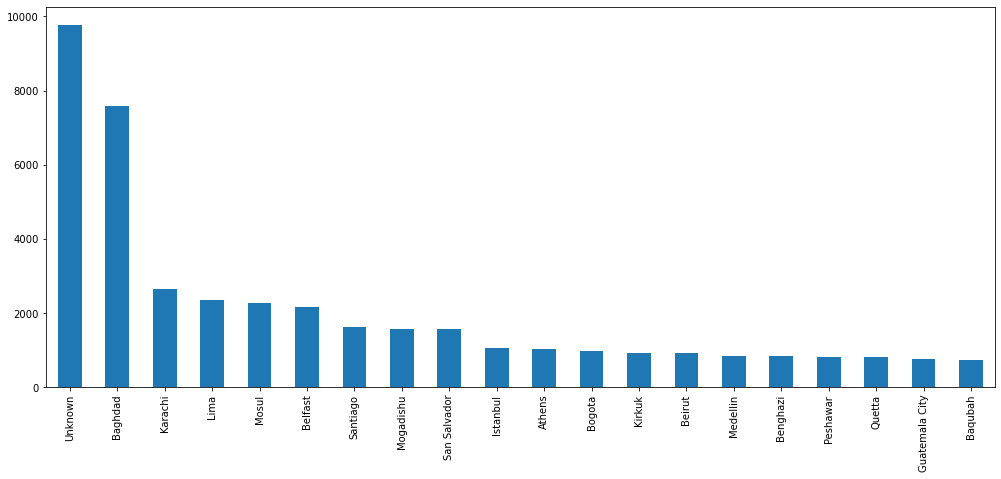

In [9]:
df['city'].value_counts().head(20).plot(kind='bar',figsize=(17,7))

# Regions in which terrorists attacks the most

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

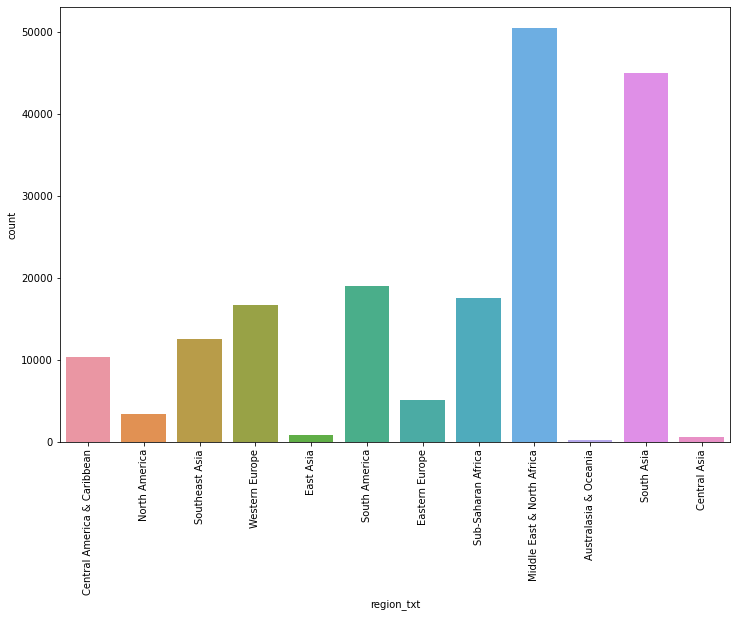

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(df['region_txt'])
plt.xticks(rotation=90)

# Days of the month on which  most terrorist attacks occured

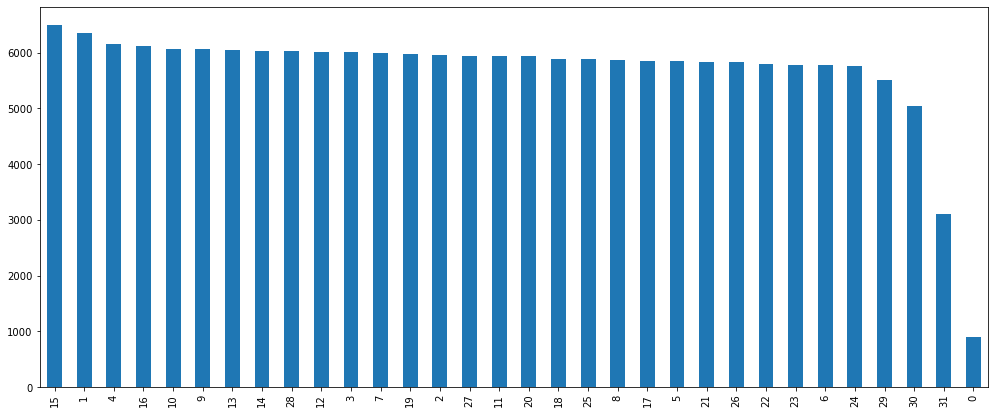

In [11]:
df['iday'].value_counts().plot(kind='bar',figsize=(17,7))

# Months in which most terrorist attacks takes place

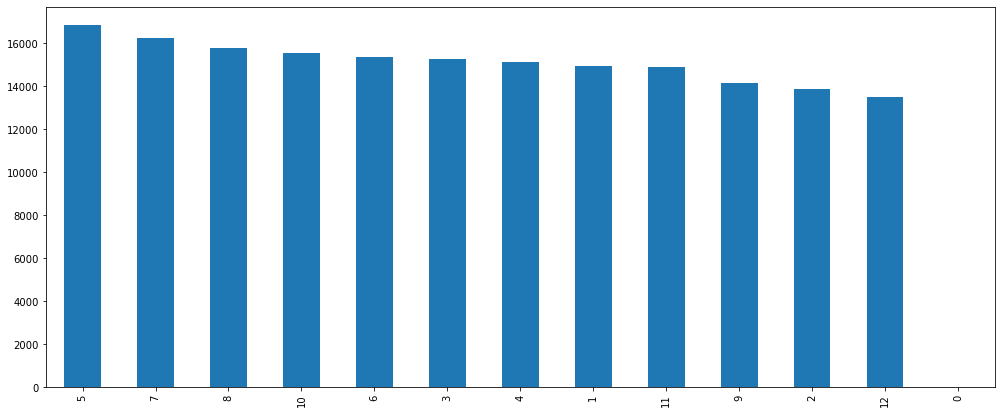

In [12]:
df['imonth'].value_counts().plot(kind='bar',figsize=(17,7))

# Countplot of the Alternative text

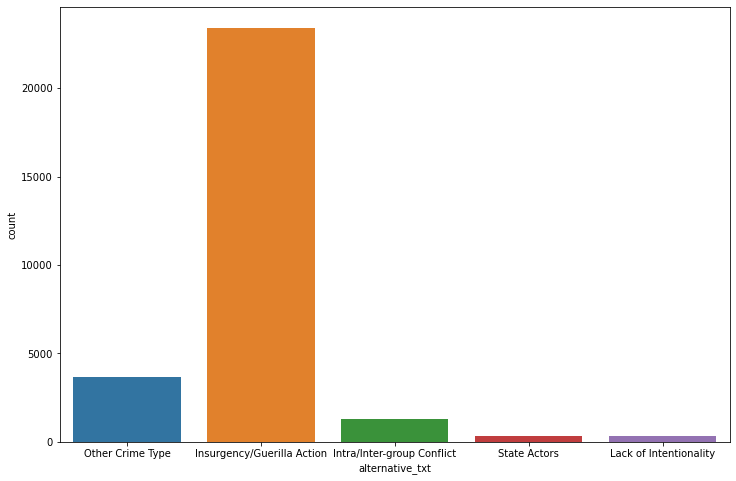

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(df['alternative_txt'])

# Visualization on the type of attack

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

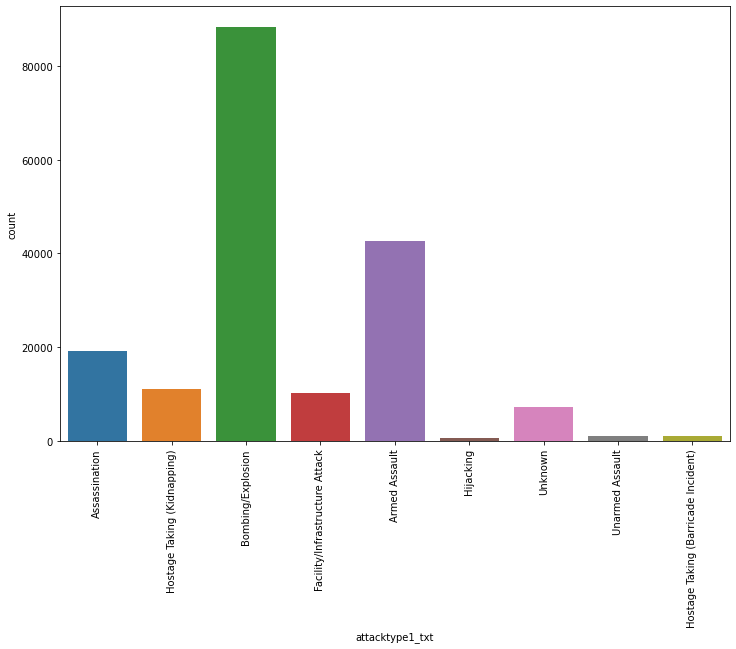

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(df['attacktype1_txt'])
plt.xticks(rotation=90)

# Top 20 targets on which terrorists attacks

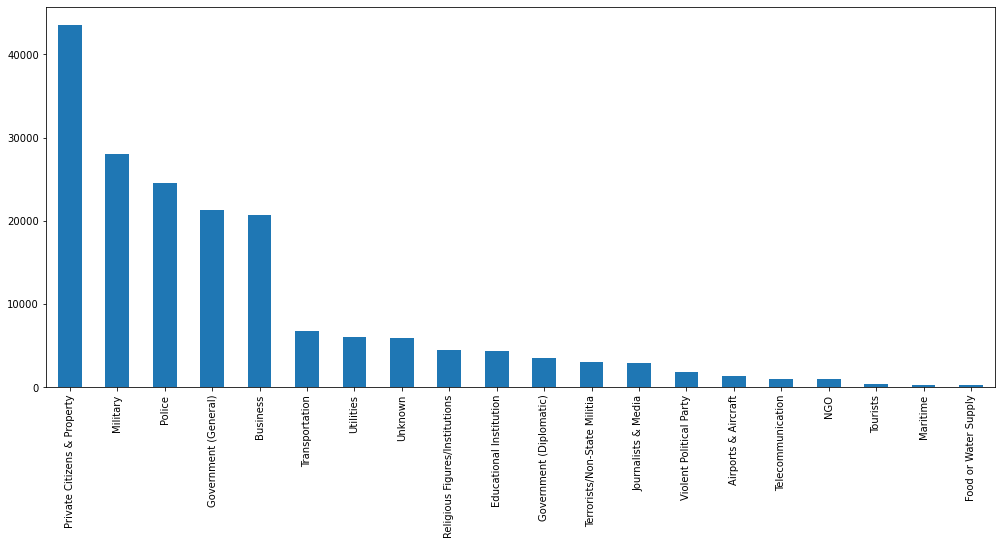

In [16]:
df['targtype1_txt'].value_counts().head(20).plot(kind='bar',figsize=(17,7))

# Types of weapons terrorists use for attack

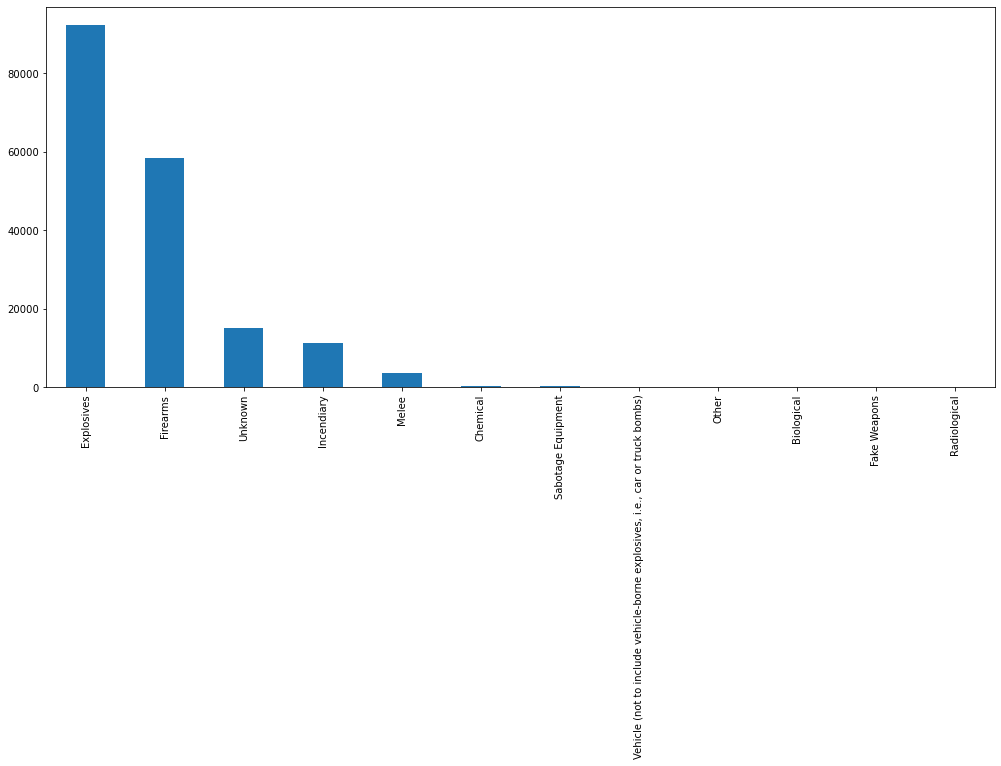

In [18]:
df['weaptype1_txt'].value_counts().plot(kind='bar',figsize=(17,7))

# Different types of claims terrorist make after attacking

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

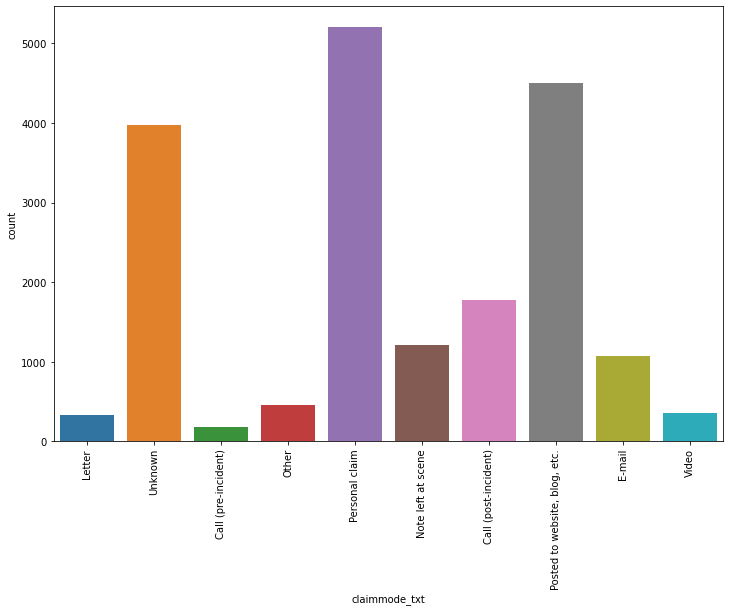

In [21]:
plt.figure(figsize=(12,8))
sns.countplot(df['claimmode_txt'])
plt.xticks(rotation=90)

# Successfull and Unsuccessfull attacks on the basis of year 

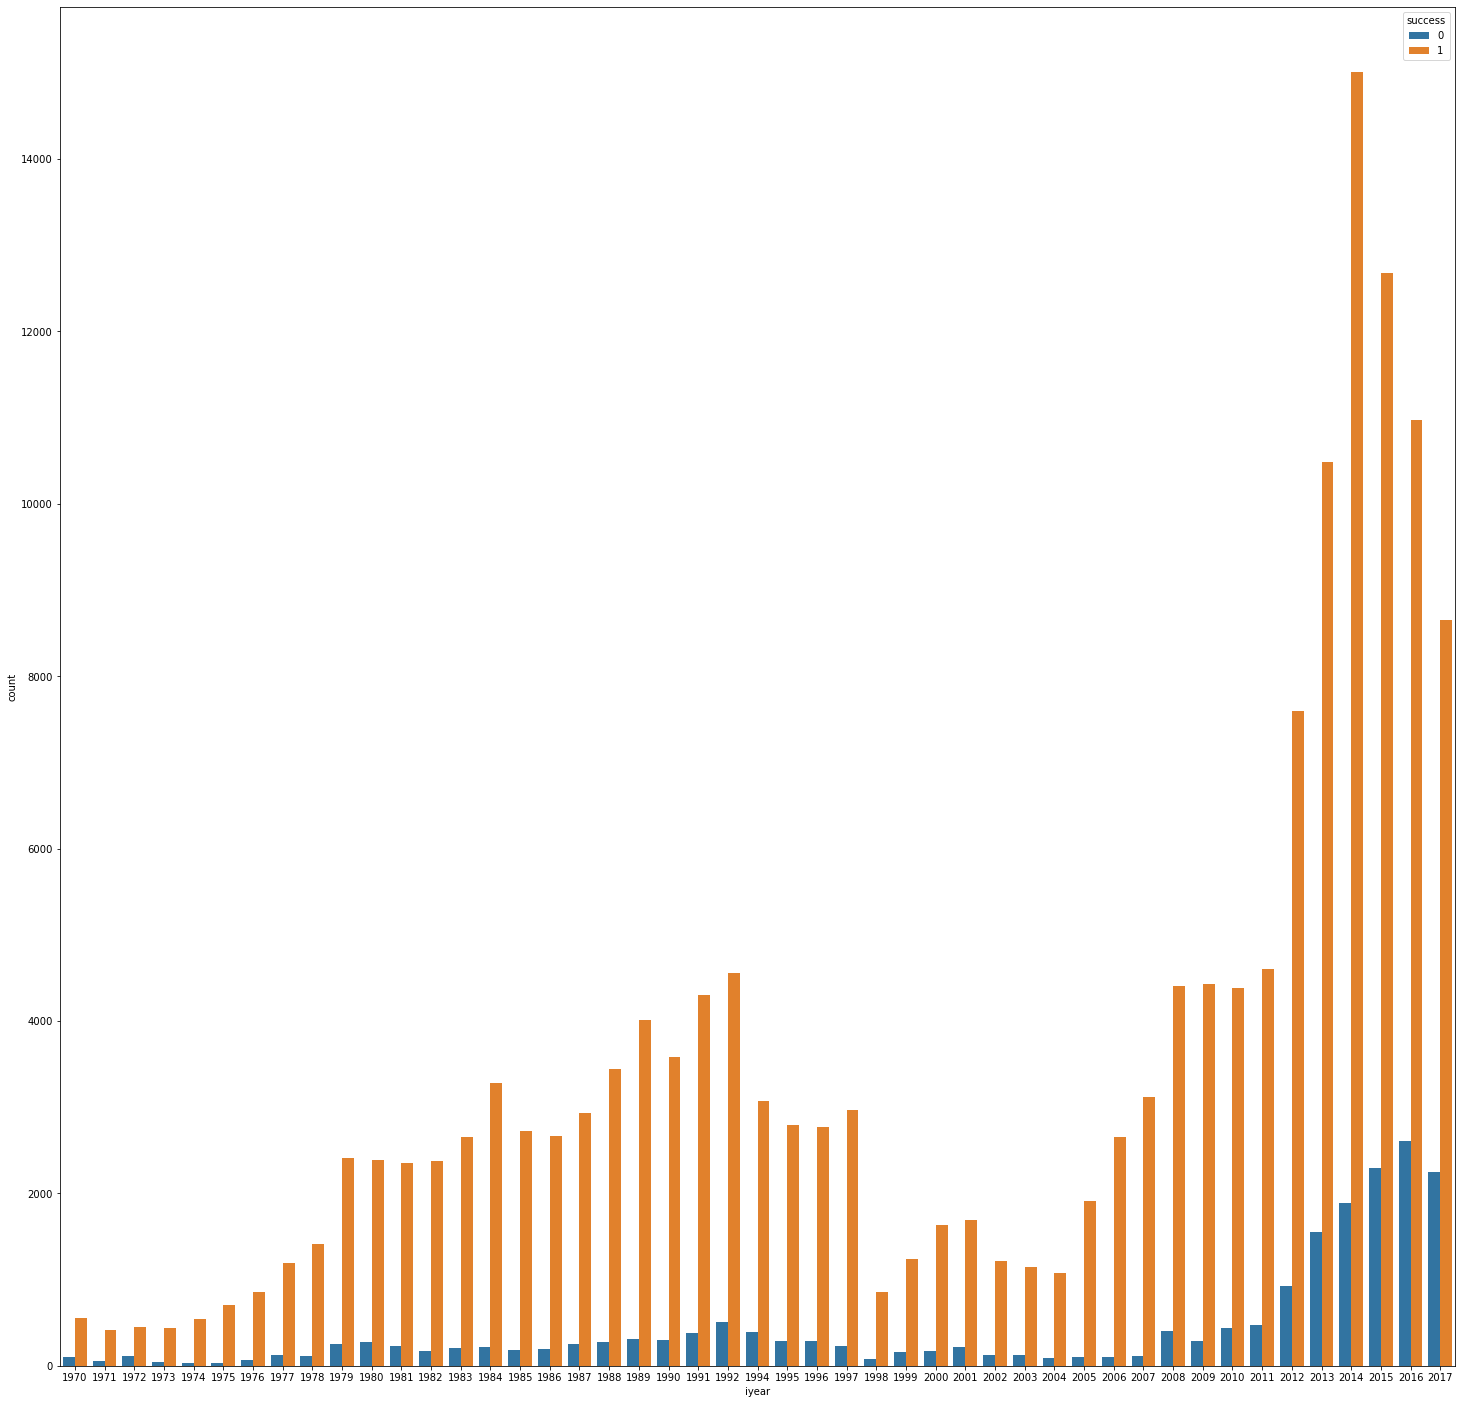

In [31]:
plt.figure(figsize=(25,25))
sns.countplot(x='iyear',hue='success',data=df)

# Visualization of the countries on the basis of number of attacks

In [33]:
import plotly.express as pf

In [35]:
df1 = df.groupby(['country_txt'],as_index=False).count()

In [44]:
fig = pf.choropleth(df1,locations='country_txt',locationmode='country names',color='iyear',hover_name='country_txt',projection='orthographic')

In [45]:
fig